In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
Data = pd.read_csv('/Users/divi/Documents/GitHub/DSIronLab/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')
Data

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
Categorical = Data.select_dtypes(include=object)

dummy = pd.get_dummies(Categorical, drop_first=True)
Numerical = Data.select_dtypes(np.number)


/Users/divi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_lifetime_value'>

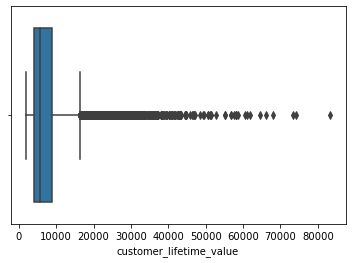

In [4]:
sns.boxplot(Numerical['customer_lifetime_value'])

/Users/divi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monthly_premium_auto'>

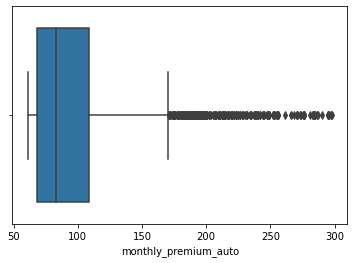

In [5]:
sns.boxplot(Numerical['monthly_premium_auto'])

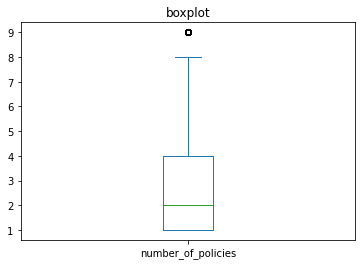

In [6]:
ax = Numerical[['number_of_policies']].plot(kind='box', title='boxplot')

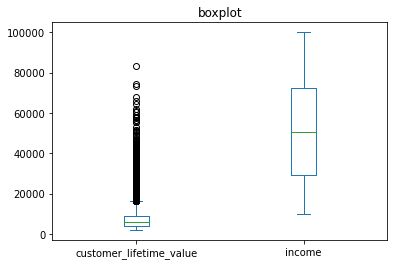

In [7]:
ax = Numerical[['customer_lifetime_value','income']].plot(kind='box', title='boxplot')

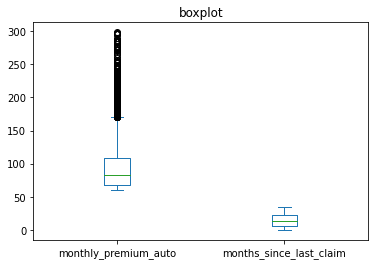

In [8]:
ax = Numerical[['monthly_premium_auto','months_since_last_claim']].plot(kind='box', title='boxplot')

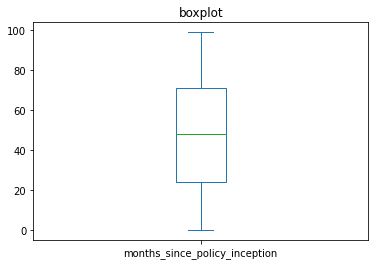

In [9]:
ax = Numerical[['months_since_policy_inception']].plot(kind='box', title='boxplot')

/Users/divi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_open_complaints'>

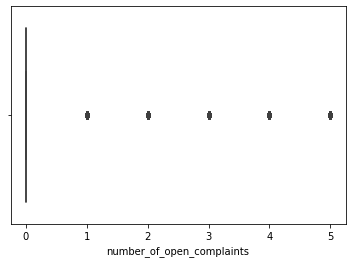

In [10]:
sns.boxplot(Numerical['number_of_open_complaints'])

In [11]:
cols = ['customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies']
Q1 = Numerical[cols].quantile(0.25)
Q3 = Numerical[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((Numerical[cols] < (Q1 - 1.5 * IQR)) | (Numerical[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
filtered_df = Numerical[condition]
filtered_df.reset_index()

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,1,2228,92260,64,3,26,0,1,744
1,2,14947,22139,100,34,31,0,2,480
2,4,9025,23675,117,33,31,0,7,707
3,5,4745,50549,61,2,73,0,7,292
4,6,5035,37405,63,8,99,3,4,287
...,...,...,...,...,...,...,...,...,...
8916,10681,3579,28304,91,10,30,2,1,655
8917,10682,2771,59855,74,30,82,4,1,355
8918,10685,5259,61146,65,7,68,0,6,273
8919,10687,11971,64195,158,0,27,4,6,618


In [12]:
dummy.reset_index()

,index,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,3,0,1,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,4,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,10685,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,10686,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,10687,0,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [13]:
Merged_df = pd.concat([filtered_df,dummy], join="outer", sort=False,axis = 1)
Merged_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
1,2228.0,92260.0,64.0,3.0,26.0,0.0,1.0,744.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947.0,22139.0,100.0,34.0,31.0,0.0,2.0,480.0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,9025.0,23675.0,117.0,33.0,31.0,0.0,7.0,707.0,0,1,...,1,0,0,0,0,0,0,0,1,0
5,4745.0,50549.0,61.0,2.0,73.0,0.0,7.0,292.0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,5035.0,37405.0,63.0,8.0,99.0,3.0,4.0,287.0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,1,0,0,0,1,0,1,0
10679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,...,0,0,0,0,1,0,0,0,1,0
10683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,1,0,0,0,1,0,0,0,1,0
10684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,1,1,0,0,0,0,1,0


In [14]:
Merged_df.mean()


customer_lifetime_value           6099.132384
income                           51842.452528
monthly_premium_auto                86.934985
months_since_last_claim             15.123080
months_since_policy_inception       48.033180
                                     ...     
vehicle_class_sports car             0.052858
vehicle_class_suv                    0.196744
vehicle_class_two-door car           0.204416
vehicle_size_medsize                 0.704275
vehicle_size_small                   0.191692
Length: 109, dtype: float64

In [15]:
Merged_df.median()

customer_lifetime_value           5305.0
income                           50450.0
monthly_premium_auto                79.0
months_since_last_claim             14.0
months_since_policy_inception       48.0
                                  ...   
vehicle_class_sports car             0.0
vehicle_class_suv                    0.0
vehicle_class_two-door car           0.0
vehicle_size_medsize                 1.0
vehicle_size_small                   0.0
Length: 109, dtype: float64

In [16]:
Merged_df=Merged_df.fillna(Merged_df.mean())

In [17]:
Merged_df.isnull().values.any()

False

##### X-Y splitting

In [21]:
X=Merged_df.drop('total_claim_amount', axis=1)
y=Merged_df.total_claim_amount

##### Data Splitting (Train-test split)

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=42)

#### standardising the train set and then transforming it

In [23]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

##### standardizing the test set

In [24]:
X_test_scaled=std_scaler.transform(X_test)

#### printing the train and test test that has been scaled

In [25]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 9.87773593e-03  4.28651249e-03 -8.13305437e-04 ... -4.99498747e-01
  -1.53465206e+00 -4.87142439e-01]
 [-4.48139035e-01 -1.70638166e+00 -1.05999618e+00 ...  2.00200703e+00
   6.51613499e-01 -4.87142439e-01]
 [-2.17602767e-01  4.31246660e-01 -9.15134051e-01 ...  2.00200703e+00
  -1.53465206e+00 -4.87142439e-01]
 ...
 [-1.26173564e+00  1.20823709e-01 -1.01170880e+00 ...  2.00200703e+00
  -1.53465206e+00 -4.87142439e-01]
 [-5.88735145e-01  3.12269529e-01  1.11293577e+00 ... -4.99498747e-01
   6.51613499e-01 -4.87142439e-01]
 [ 1.56017990e+00 -1.38891864e+00  2.22354543e+00 ... -4.99498747e-01
   6.51613499e-01 -4.87142439e-01]]
--------
[[-1.19178218e+00 -6.45575576e-01 -1.01170880e+00 ... -4.99498747e-01
   6.51613499e-01 -4.87142439e-01]
 [ 8.85111819e-01  1.78769155e+00  9.68073637e-01 ... -4.99498747e-01
   6.51613499e-01 -4.87142439e-01]
 [ 9.87773593e-03  4.28651249e-03 -8.13305437e-04 ... -4.99498747e-01
   6.51613499e-01 -4.87142439e-01]
 ...
 [ 1.65935150e-01  1.95492419e-01 -

#### Applying Linear Regression to

In [26]:
# Train set
X_train_const_scaled = sm.add_constant(X_train_scaled) # states that we are fitting to the model y=mx+b rather than y=mx.
model = sm.OLS(y_train, X_train_const_scaled).fit() # creating a linear regression model y=mx+b, and fitting it to the train data.
predictions_train = model.predict(X_train_const_scaled)

In [27]:
# Test set
X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled)

In [28]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     145.0
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:37:02   Log-Likelihood:                -46578.
No. Observations:                7482   AIC:                         9.337e+04
Df Residuals:                    7376   BIC:                         9.410e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        402.0448      1.424    282.343      0.0

In [29]:
predictions_test

array([360.26389528, 234.51452213, 570.39913721, ..., 124.84422448,
       469.14081293, 576.4595561 ])

### Model fitting using scikit 

In [ ]:
model=LinearRegression()      #model
model.fit(X_train_scaled, y_train)

In [30]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
7889,6099.132384,51842.452528,86.934985,15.12308,48.03318,0.391436,2.751485,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3230,4770.000000,12964.000000,65.000000,2.00000,37.00000,0.000000,4.000000,0,0,1,...,0,0,1,0,0,0,0,1,1,0
5386,5439.000000,61546.000000,68.000000,4.00000,27.00000,0.000000,3.000000,0,0,1,...,0,1,0,0,0,0,0,1,0,0
8887,6099.132384,51842.452528,86.934985,15.12308,48.03318,0.391436,2.751485,0,1,0,...,0,1,0,0,0,1,0,0,0,0
909,7356.000000,36812.000000,92.000000,23.00000,98.00000,1.000000,4.000000,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,4513.000000,34558.000000,113.000000,32.00000,24.00000,0.000000,1.000000,0,0,1,...,0,1,0,0,0,0,1,0,1,0
6230,7123.000000,21835.000000,92.000000,2.00000,83.00000,0.000000,3.000000,0,1,0,...,0,0,0,0,0,0,0,1,1,0
6454,2409.000000,54491.000000,66.000000,3.00000,97.00000,0.000000,1.000000,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1039,4362.000000,58842.000000,110.000000,6.00000,74.00000,0.000000,1.000000,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [32]:
y_pred=model.predict(X_test_scaled)   # model prediction

#y_pred_train=model.predict(X_train_scaled)

ValueError: shapes (3207,108) and (109,) not aligned: 108 (dim 1) != 109 (dim 0)